In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
# 필요한 라이브러리를 불러옵니다.
import tensorflow as tf
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/test.csv
/kaggle/input/bike-sharing-demand/train.csv


In [45]:
train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')
submission = pd.read_csv('/kaggle/input/bike-sharing-demand/sampleSubmission.csv')

In [3]:
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [4]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [5]:
train = train.drop(['casual', 'registered', 'holiday', 'workingday'], axis=1)
train

,datetime,season,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,1,13.94,17.425,61,6.0032,129


In [6]:
count = train['count']
train = train.drop(['count'], axis=1)

In [7]:
train

,datetime,season,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000
1,2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000
2,2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000
3,2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000
4,2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027
10882,2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013
10883,2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013
10884,2012-12-19 22:00:00,4,1,13.94,17.425,61,6.0032


In [8]:
train['datetime'] = train['datetime'].astype('datetime64')
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [9]:
train = train.drop(['datetime'], axis=1)
train

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,1,13.94,17.425,61,6.0032,2012,12,19,22


In [10]:
train = train.drop(['season', 'weather'], axis=1)
train

,temp,atemp,humidity,windspeed,year,month,day,hour
0,9.84,14.395,81,0.0000,2011,1,1,0
1,9.02,13.635,80,0.0000,2011,1,1,1
2,9.02,13.635,80,0.0000,2011,1,1,2
3,9.84,14.395,75,0.0000,2011,1,1,3
4,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,2012,12,19,19
10882,14.76,17.425,57,15.0013,2012,12,19,20
10883,13.94,15.910,61,15.0013,2012,12,19,21
10884,13.94,17.425,61,6.0032,2012,12,19,22


In [11]:
train['year'] = train['year'] / 100  ## 가중치 조절

In [12]:
train

,temp,atemp,humidity,windspeed,year,month,day,hour
0,9.84,14.395,81,0.0000,20.11,1,1,0
1,9.02,13.635,80,0.0000,20.11,1,1,1
2,9.02,13.635,80,0.0000,20.11,1,1,2
3,9.84,14.395,75,0.0000,20.11,1,1,3
4,9.84,14.395,75,0.0000,20.11,1,1,4
...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,20.12,12,19,19
10882,14.76,17.425,57,15.0013,20.12,12,19,20
10883,13.94,15.910,61,15.0013,20.12,12,19,21
10884,13.94,17.425,61,6.0032,20.12,12,19,22


In [13]:
count = np.array(count)
print(count.shape)
print(count)

(10886,)
[ 16  40  32 ... 168 129  88]


In [14]:
X_train = train.values
print(X_train)
print(X_train.shape)

[[ 9.84  14.395 81.    ...  1.     1.     0.   ]
 [ 9.02  13.635 80.    ...  1.     1.     1.   ]
 [ 9.02  13.635 80.    ...  1.     1.     2.   ]
 ...
 [13.94  15.91  61.    ... 12.    19.    21.   ]
 [13.94  17.425 61.    ... 12.    19.    22.   ]
 [13.12  16.665 66.    ... 12.    19.    23.   ]]
(10886, 8)


In [17]:
## layer를 쌓을 때 첫번째 레이어의 약수로 쌓으면 성능이 좋다.
model = Sequential()
model.add(Dense(25, input_dim=8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.fit(X_train, count, epochs=150, batch_size=10)

Epoch 1/150
1089/1089 [==============================] - 1s 1ms/step - loss: 69396.5312
Epoch 2/150
1089/1089 [==============================] - 1s 1ms/step - loss: 54504.6953
Epoch 3/150
1089/1089 [==============================] - 1s 1ms/step - loss: 22006.9258
Epoch 4/150
1089/1089 [==============================] - 1s 1ms/step - loss: 21514.9941
Epoch 5/150
1089/1089 [==============================] - 1s 1ms/step - loss: 21264.9883
Epoch 6/150
1089/1089 [==============================] - 1s 1ms/step - loss: 20881.3809
Epoch 7/150
1089/1089 [==============================] - 1s 1ms/step - loss: 20311.0703
Epoch 8/150
1089/1089 [==============================] - 1s 1ms/step - loss: 19728.8398
Epoch 9/150
1089/1089 [==============================] - 1s 1ms/step - loss: 19201.9043
Epoch 10/150
1089/1089 [==============================] - 1s 1ms/step - loss: 18769.0469
Epoch 11/150
1089/1089 [==============================] - 1s 1ms/step - loss: 18445.5371
Epoch 12/150
1089/1089 [======

Epoch 93/150
1089/1089 [==============================] - 1s 1ms/step - loss: 13478.7979
Epoch 94/150
1089/1089 [==============================] - 1s 1ms/step - loss: 13418.1904
Epoch 95/150
1089/1089 [==============================] - 1s 1ms/step - loss: 13400.1982
Epoch 96/150
1089/1089 [==============================] - 1s 1ms/step - loss: 13372.9697
Epoch 97/150
1089/1089 [==============================] - 1s 1ms/step - loss: 13348.8506
Epoch 98/150
1089/1089 [==============================] - 1s 1ms/step - loss: 13326.0918
Epoch 99/150
1089/1089 [==============================] - 1s 1ms/step - loss: 13288.6045
Epoch 100/150
1089/1089 [==============================] - 1s 1ms/step - loss: 13242.3857
Epoch 101/150
1089/1089 [==============================] - 1s 1ms/step - loss: 13180.5781
Epoch 102/150
1089/1089 [==============================] - 1s 1ms/step - loss: 13207.1211
Epoch 103/150
1089/1089 [==============================] - 1s 1ms/step - loss: 13195.7393
Epoch 104/150
108

In [20]:
test = test.drop(['holiday', 'workingday'], axis=1)
test

,datetime,season,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,1,10.66,13.635,56,8.9981


In [24]:
test = test.drop(['season', 'weather'], axis=1)
test

,temp,atemp,humidity,windspeed,year,month,day,hour
0,10.66,11.365,56,26.0027,20.11,1,20,0
1,10.66,13.635,56,0.0000,20.11,1,20,1
2,10.66,13.635,56,0.0000,20.11,1,20,2
3,10.66,12.880,56,11.0014,20.11,1,20,3
4,10.66,12.880,56,11.0014,20.11,1,20,4
...,...,...,...,...,...,...,...,...
6488,10.66,12.880,60,11.0014,20.12,12,31,19
6489,10.66,12.880,60,11.0014,20.12,12,31,20
6490,10.66,12.880,60,11.0014,20.12,12,31,21
6491,10.66,13.635,56,8.9981,20.12,12,31,22


In [21]:
test['datetime'] = test['datetime'].astype('datetime64')
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [22]:
test = test.drop(['datetime'], axis=1)

In [23]:
test['year'] = test['year'] / 100  ## year의 가중치가 너무 높게 설정되었기 때문에 적절하게 scaling
test

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,1,10.66,11.365,56,26.0027,20.11,1,20,0
1,1,1,10.66,13.635,56,0.0000,20.11,1,20,1
2,1,1,10.66,13.635,56,0.0000,20.11,1,20,2
3,1,1,10.66,12.880,56,11.0014,20.11,1,20,3
4,1,1,10.66,12.880,56,11.0014,20.11,1,20,4
...,...,...,...,...,...,...,...,...,...,...
6488,1,2,10.66,12.880,60,11.0014,20.12,12,31,19
6489,1,2,10.66,12.880,60,11.0014,20.12,12,31,20
6490,1,1,10.66,12.880,60,11.0014,20.12,12,31,21
6491,1,1,10.66,13.635,56,8.9981,20.12,12,31,22


In [25]:
X_test = test.values

In [24]:
print(X_test)
print(X_test.shape)

[[10.66  11.365 56.    ...  1.    20.     0.   ]
 [10.66  13.635 56.    ...  1.    20.     1.   ]
 [10.66  13.635 56.    ...  1.    20.     2.   ]
 ...
 [10.66  12.88  60.    ... 12.    31.    21.   ]
 [10.66  13.635 56.    ... 12.    31.    22.   ]
 [10.66  13.635 65.    ... 12.    31.    23.   ]]
(6493, 8)


In [33]:
result = model.predict(X_test)

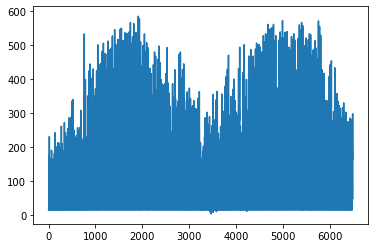

In [35]:
result = result.flatten()
plt.plot(abs(result))

In [39]:
result

array([ 13.892266,  13.892266,  13.892266, ..., 131.29703 ,  90.64912 ,
        47.955986], dtype=float32)

In [40]:
import csv

submission['count'] = result

In [41]:
submission

,datetime,count
0,2011-01-20 00:00:00,14.0
1,2011-01-20 01:00:00,14.0
2,2011-01-20 02:00:00,14.0
3,2011-01-20 03:00:00,14.0
4,2011-01-20 04:00:00,14.0
...,...,...
6488,2012-12-31 19:00:00,218.0
6489,2012-12-31 20:00:00,175.0
6490,2012-12-31 21:00:00,131.0
6491,2012-12-31 22:00:00,91.0


In [42]:
submission.to_csv('submission.csv', index=False)